# Regression

## Part 1 - Regression on years of experience to determine salary

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Importing the dataset
dataset = pd.read_csv('lecture_3_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [19]:
# Lets look at the data
dataset.head(10)

,experience,salary
0,0.849459,38266.285652
1,8.285586,89485.149501
2,2.161426,55275.055314
3,3.155742,57860.155303
4,2.758080,51502.964477
5,5.583005,68468.540035
6,7.797191,87760.645682
7,5.572169,68708.518212
8,4.096858,57356.762976
9,6.309587,76478.527038


In [20]:
# lets look at the shape
print(dataset.shape)

(1000, 2)


In [21]:
# check if there are any n/a values
print(dataset['experience'].isna().sum())
print(dataset['salary'].isna().sum())

0
0


In [22]:
#Lets see what the statistics are for this dataset
dataset.describe()

,experience,salary
count,1000.000000,1000.000000
mean,5.169042,67378.355958
std,1.701020,11408.917400
min,0.000000,30000.000000
25%,4.043965,59594.716183
50%,5.147043,67464.205136
75%,6.292472,74729.518457
max,10.000000,100000.000000


In [23]:
# Create a Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# Fit Simple Linear Regression
from sklearn.linear_model import LinearRegression
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# make some predictions
y_hat = simple_regressor.predict(X_test)

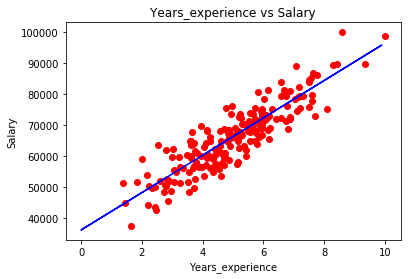

In [26]:
#Visualize our data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, simple_regressor.predict(X_train), color = 'blue')
plt.title('Years_experience vs Salary')
plt.xlabel('Years_experience')
plt.ylabel('Salary')
plt.show()

### Try it - Predict the salary for an employee

In [30]:
#want to predict a new salary using years of experience.
X_var = 200
print(simple_regressor.predict(np.array([X_var]).reshape(-1,1)))#20 years of experience

[1241730.22944385]


In [31]:
# Try doing the same for an employee that has more years of experience than anyone else in the dataset (10 years is the max in the dataset)

## Part 2 - Salary for different types of employees

### Import the libraries

In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('salary.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

### Fit a linear regression model

In [33]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_hat = linear_model.predict(X)

## Lets plot the linear model

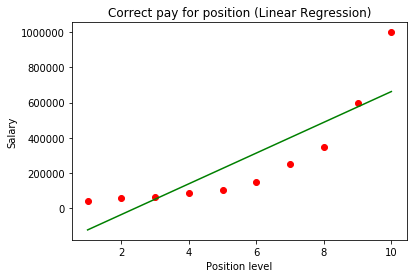

In [34]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Lets now try it for Polynomial regression

In [35]:
# Fitting Polynomial Regression to the dataset
#transform our original data to the original position levels and associated polynomial terms.
from sklearn.preprocessing import PolynomialFeatures
polynomial_feat = PolynomialFeatures(degree = 4)#here we convert our X values into polinomial features to follow the polynomial regression formula
X_polynomial = polynomial_feat.fit_transform(X)

linear_model_2 = LinearRegression()
linear_model_2.fit(X_polynomial, y)
y_hat = linear_model_2.predict(X_polynomial)

In [36]:
## Lets plot the polynomial regression

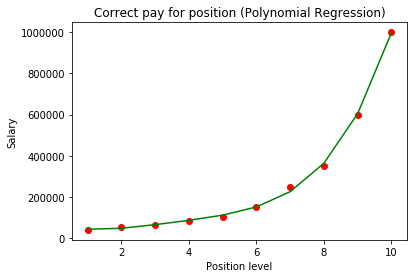

In [37]:
# plotting the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Lets now try the decision tree regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)
y_hat = tree_regressor.predict(X)


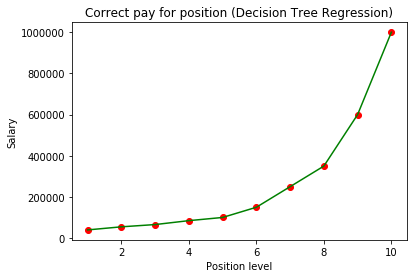

In [39]:
## Lets now plot it:
# plotting the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## This is not how it truly looks... Actually this is because of the plot function... Remember if it falls into the leaf then it will just be the average

## We can visualize it like this:

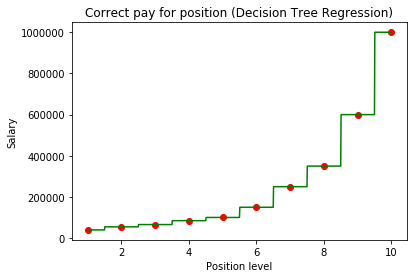

In [40]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_hat = tree_regressor.predict(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_hat, color = 'green')
plt.title('Correct pay for position (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## we can see it looks like this because it is putting it into leaves

## Lets now try with Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

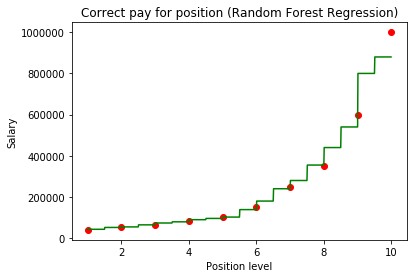

In [42]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_hat = forest_regressor.predict(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_hat, color = 'green')
plt.title('Correct pay for position (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### When using RF regressor we can see that we still get a model that splits the range of levels and gives us the average of the interval, its non continuous. We just get more steps meaning we get more intervals. We get more steps because the range of levels is split into more intervals.

# Part 3: Try it your self!

### Assignment: Try to fit a multiple linear regression model to our 1000 employee salary dataset

In [53]:
# Importing the dataset
dataset = pd.read_csv('lecture_3_data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 1].values

In [54]:
X['gender'] = np.random.randint(low=0,high=2, size=1000)
X.head(5)
X = X.values

In [55]:
# Create a Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
# Use linear regression to fit and plot the data, similar to before

In [ ]:
#Bonus: Try to fit it with a random forest regression